# CSI 4142 Project Deliverable 2
## Physical Design and Data Staging
### Group 1 Member
| Name | Student ID |
|-------|---------------|
| Gary Gao | 300124236|
| Yingqi Feng | 300077437|
| Binxuan Wu | 300142301 | 

In [ ]:
import pandas as pd
import numpy as np

#Dimension Model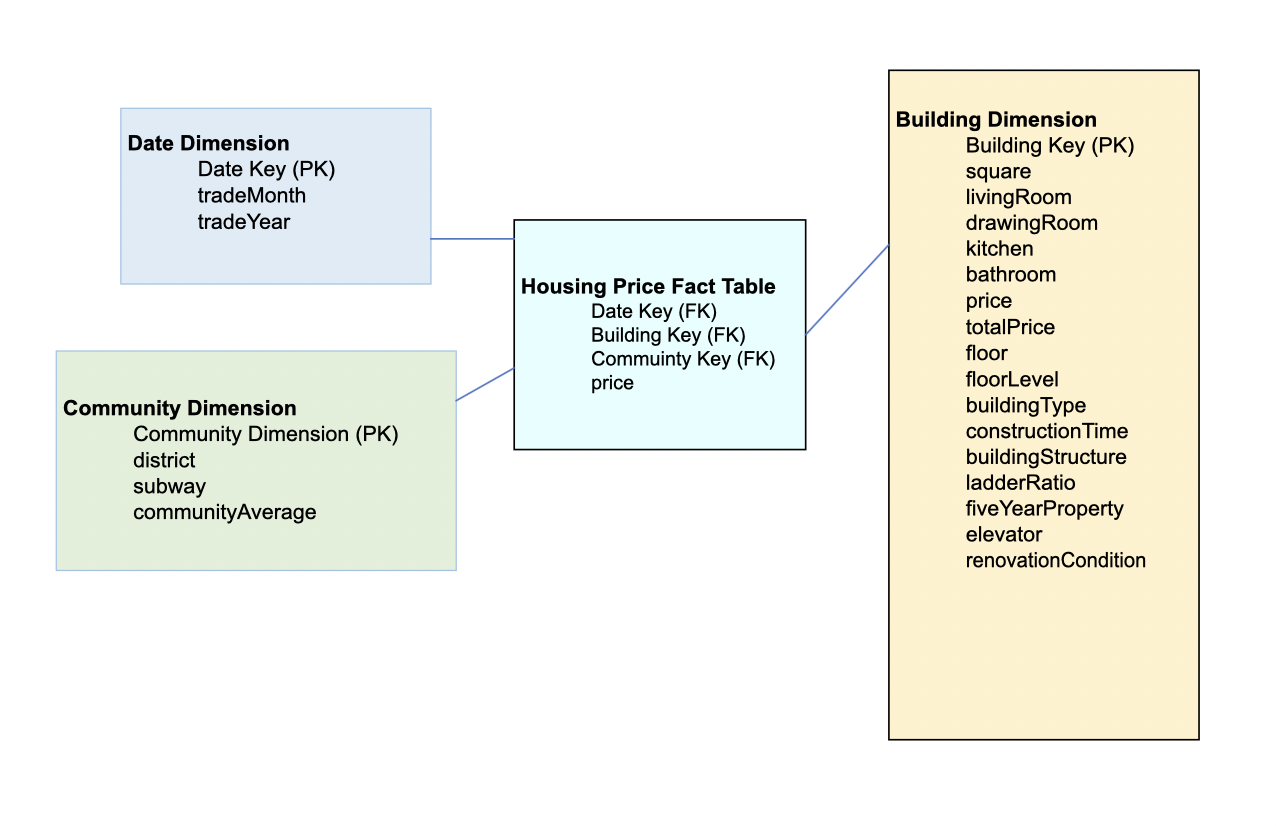

# Extract


In [ ]:
url = "https://raw.githubusercontent.com/BinxuanWu/CSI4142-Project/main/Beijing.csv"
df = pd.read_csv(url, encoding = 'gb2312')
df.head()

<ipython-input-173-bd293a1c6b28>:2: DtypeWarning: Columns (1,11,12,14) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(url, encoding = 'gb2312')


,url,id,Lng,Lat,Cid,tradeTime,DOM,followers,totalPrice,price,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,https://bj.lianjia.com/chengjiao/101084782030....,101084782030,116.475489,40.019520,1111027376244,2016/8/9,1464.0,106,415.0,31680,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,https://bj.lianjia.com/chengjiao/101086012217....,101086012217,116.453917,39.881534,1111027381879,2016/7/28,903.0,126,575.0,43436,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,https://bj.lianjia.com/chengjiao/101086041636....,101086041636,116.561978,39.877145,1111040862969,2016/12/11,1271.0,48,1030.0,52021,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,https://bj.lianjia.com/chengjiao/101086406841....,101086406841,116.438010,40.076114,1111043185817,2016/9/30,965.0,138,297.5,22202,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,https://bj.lianjia.com/chengjiao/101086920653....,101086920653,116.428392,39.886229,1111027381174,2016/8/28,927.0,286,392.0,48396,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


In [ ]:
df.dtypes

url                     object
id                      object
Lng                    float64
Lat                    float64
Cid                      int64
tradeTime               object
DOM                    float64
followers                int64
totalPrice             float64
price                    int64
square                 float64
livingRoom              object
drawingRoom             object
kitchen                  int64
bathRoom                object
floor                   object
buildingType           float64
constructionTime        object
renovationCondition      int64
buildingStructure        int64
ladderRatio            float64
elevator               float64
fiveYearsProperty      float64
subway                 float64
district                 int64
communityAverage       float64
dtype: object

In [ ]:
df.isnull().sum()

url                         0
id                          0
Lng                         0
Lat                         0
Cid                         0
tradeTime                   0
DOM                    157977
followers                   0
totalPrice                  0
price                       0
square                      0
livingRoom                  0
drawingRoom                 0
kitchen                     0
bathRoom                    0
floor                       0
buildingType             2021
constructionTime            0
renovationCondition         0
buildingStructure           0
ladderRatio                 0
elevator                   32
fiveYearsProperty          32
subway                     32
district                    0
communityAverage          463
dtype: int64

#Transform

##Drop unrequire Column


In [ ]:
df = df.drop(['url'], axis=1)
df = df.drop(['DOM'], axis=1)
df = df.drop(['followers'], axis=1)
df = df.drop(['Lng'], axis=1)
df = df.drop(['Lat'], axis=1)

df.head()



,id,Cid,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,101084782030,1111027376244,2016/8/9,415.0,31680,131.00,2,1,1,1,...,1.0,2005,3,6,0.217,1.0,0.0,1.0,7,56021.0
1,101086012217,1111027381879,2016/7/28,575.0,43436,132.38,2,2,1,2,...,1.0,2004,4,6,0.667,1.0,1.0,0.0,7,71539.0
2,101086041636,1111040862969,2016/12/11,1030.0,52021,198.00,3,2,1,3,...,4.0,2005,3,6,0.500,1.0,0.0,0.0,7,48160.0
3,101086406841,1111043185817,2016/9/30,297.5,22202,134.00,3,1,1,1,...,1.0,2008,1,6,0.273,1.0,0.0,0.0,6,51238.0
4,101086920653,1111027381174,2016/8/28,392.0,48396,81.00,2,1,1,1,...,4.0,1960,2,2,0.333,0.0,1.0,1.0,1,62588.0


## Check if the id is unique

In [ ]:
id_dup = df.duplicated(subset='id')
if id_dup.any():
    print("Duplicated id")
else:
    print("id unique")


id unique


##Handling missing value

replce the null value with the 0, for column "buildingType" in this column, the different number represent different attribute: unknow (0),tower(1), bungalow(2), combination of plate and tower(3), plate(4).

In [ ]:
df['buildingType']=df['buildingType'].replace(np.nan,0)
df.isnull().sum()


id                       0
Cid                      0
tradeTime                0
totalPrice               0
price                    0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
floor                    0
buildingType             0
constructionTime         0
renovationCondition      0
buildingStructure        0
ladderRatio              0
elevator                32
fiveYearsProperty       32
subway                  32
district                 0
communityAverage       463
dtype: int64

With Purpose of data completeness, remove rows with null values in the dataset


In [ ]:
df=df.dropna(subset=['elevator'])
len(df)
df.isnull().sum()

id                       0
Cid                      0
tradeTime                0
totalPrice               0
price                    0
square                   0
livingRoom               0
drawingRoom              0
kitchen                  0
bathRoom                 0
floor                    0
buildingType             0
constructionTime         0
renovationCondition      0
buildingStructure        0
ladderRatio              0
elevator                 0
fiveYearsProperty        0
subway                   0
district                 0
communityAverage       463
dtype: int64

For those communityAverage where the value is null, replace with the column median.

In [ ]:
df = df.copy()
df['communityAverage']=df['communityAverage'].fillna(df['communityAverage'].median())
df['communityAverage'].isnull().sum()


0

In [ ]:
df['bathRoom']=df['bathRoom'].astype(int)
df['kitchen']=df['kitchen'].astype(int)
df['drawingRoom']=df['drawingRoom'].astype(int)

df['constructionTime'] = df['constructionTime'].replace('未知', '0000')
df['constructionTime']=df['constructionTime'].astype(int)


##transforming the data into a format that can be used for analysis



In [ ]:
df = df.copy()
df['subway']=df['subway'].astype(bool)
df['elevator']=df['elevator'].astype(bool)
df['fiveYearsProperty']=df['fiveYearsProperty'].astype(bool)
df.head()

,id,Cid,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,101084782030,1111027376244,2016/8/9,415.0,31680,131.00,2,1,1,1,...,1.0,2005,3,6,0.217,True,False,True,7,56021.0
1,101086012217,1111027381879,2016/7/28,575.0,43436,132.38,2,2,1,2,...,1.0,2004,4,6,0.667,True,True,False,7,71539.0
2,101086041636,1111040862969,2016/12/11,1030.0,52021,198.00,3,2,1,3,...,4.0,2005,3,6,0.500,True,False,False,7,48160.0
3,101086406841,1111043185817,2016/9/30,297.5,22202,134.00,3,1,1,1,...,1.0,2008,1,6,0.273,True,False,False,6,51238.0
4,101086920653,1111027381174,2016/8/28,392.0,48396,81.00,2,1,1,1,...,4.0,1960,2,2,0.333,False,True,True,1,62588.0


Set the unit of totalprice from ¥10000 to ¥1

In [ ]:
df['totalPrice']=df['totalPrice']*10000
len(df)


318819

##Create new feature from existing feature

In [ ]:
df = df.copy()
df[['floorLevel','floor']] = df['floor'].str.split(' ', 1, expand=True)
df['floor']=df['floor'].astype(int)


In [ ]:
df.loc[df['floorLevel'] == '高', 'floorLevel'] = 'high'
df.loc[df['floorLevel'] == '中', 'floorLevel'] = 'middle'
df.loc[df['floorLevel'] == '低', 'floorLevel'] = 'low'
df.loc[df['floorLevel'] == '底', 'floorLevel'] = 'bottom'
df.loc[df['floorLevel'] == '顶', 'floorLevel'] = 'top'
df.loc[df['floorLevel'] == '未知', 'floorLevel'] = 'unknown'
df['floorLevel']

0           high
1           high
2         middle
3         bottom
4         middle
           ...  
318846    middle
318847    middle
318848    middle
318849    middle
318850    middle
Name: floorLevel, Length: 318819, dtype: object

In [ ]:
df['floorLevel'].value_counts()

middle     119832
high        70094
low         64136
top         37406
bottom      26080
unknown      1271
Name: floorLevel, dtype: int64

In [ ]:
df['tradeTime']= pd.to_datetime(df['tradeTime'])
df['tradeYear'] = df['tradeTime'].dt.year
df['tradeMonth'] = df['tradeTime'].dt.month
df.head()

,id,Cid,tradeTime,totalPrice,price,square,livingRoom,drawingRoom,kitchen,bathRoom,...,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage,floorLevel,tradeYear,tradeMonth
0,101084782030,1111027376244,2016-08-09,4150000.0,31680,131.00,2,1,1,1,...,6,0.217,True,False,True,7,56021.0,high,2016,8
1,101086012217,1111027381879,2016-07-28,5750000.0,43436,132.38,2,2,1,2,...,6,0.667,True,True,False,7,71539.0,high,2016,7
2,101086041636,1111040862969,2016-12-11,10300000.0,52021,198.00,3,2,1,3,...,6,0.500,True,False,False,7,48160.0,middle,2016,12
3,101086406841,1111043185817,2016-09-30,2975000.0,22202,134.00,3,1,1,1,...,6,0.273,True,False,False,6,51238.0,bottom,2016,9
4,101086920653,1111027381174,2016-08-28,3920000.0,48396,81.00,2,1,1,1,...,2,0.333,False,True,True,1,62588.0,middle,2016,8


## Generate Surrogate Keys

In [ ]:
df['Surrogate Keys'] = range(1,len(df)+1)

Place Surrogate Key in the front columns and reindex the data frame

In [ ]:
new_index = ['Surrogate Keys','id', 'Cid', 'tradeTime',	'tradeYear', 'tradeMonth', 
             'totalPrice', 'price', 'square', 'livingRoom', 'drawingRoom',  
             'kitchen', 'bathRoom', 'floor',  'floorLevel', 'buildingType', 'constructionTime', 
             'renovationCondition', 'buildingStructure', 'ladderRatio', 'elevator', 
             'fiveYearsProperty', 'subway', 'district', 'communityAverage', ]
df = df.reindex(columns = new_index)
df

,Surrogate Keys,id,Cid,tradeTime,tradeYear,tradeMonth,totalPrice,price,square,livingRoom,...,buildingType,constructionTime,renovationCondition,buildingStructure,ladderRatio,elevator,fiveYearsProperty,subway,district,communityAverage
0,1,101084782030,1111027376244,2016-08-09,2016,8,4150000.0,31680,131.00,2,...,1.0,2005,3,6,0.217,True,False,True,7,56021.0
1,2,101086012217,1111027381879,2016-07-28,2016,7,5750000.0,43436,132.38,2,...,1.0,2004,4,6,0.667,True,True,False,7,71539.0
2,3,101086041636,1111040862969,2016-12-11,2016,12,10300000.0,52021,198.00,3,...,4.0,2005,3,6,0.500,True,False,False,7,48160.0
3,4,101086406841,1111043185817,2016-09-30,2016,9,2975000.0,22202,134.00,3,...,1.0,2008,1,6,0.273,True,False,False,6,51238.0
4,5,101086920653,1111027381174,2016-08-28,2016,8,3920000.0,48396,81.00,2,...,4.0,1960,2,2,0.333,False,True,True,1,62588.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
318846,318815,BJYZ92311192,1111027377053,2016-06-10,2016,6,3500000.0,20580,170.07,3,...,4.0,2003,1,6,0.333,False,True,False,3,36545.0
318847,318816,BJYZ92320171,1111027377957,2016-06-10,2016,6,1088000.0,31006,35.09,1,...,1.0,2009,1,6,0.222,True,False,True,3,54282.0
318848,318817,BJYZ92324217,1111027380056,2016-06-05,2016,6,3590000.0,35138,102.17,2,...,4.0,2000,3,6,0.500,True,True,False,3,46927.0
318849,318818,BJYZ92333313,1111027377054,2016-06-12,2016,6,7200000.0,40373,178.34,4,...,4.0,2003,4,2,0.500,False,True,False,3,54842.0


# Load

In [ ]:
df.dtypes

Surrogate Keys                  int64
id                             object
Cid                             int64
tradeTime              datetime64[ns]
tradeYear                       int64
tradeMonth                      int64
totalPrice                    float64
price                           int64
square                        float64
livingRoom                     object
drawingRoom                     int64
kitchen                         int64
bathRoom                        int64
floor                           int64
floorLevel                     object
buildingType                  float64
constructionTime                int64
renovationCondition             int64
buildingStructure               int64
ladderRatio                   float64
elevator                         bool
fiveYearsProperty                bool
subway                           bool
district                        int64
communityAverage              float64
dtype: object

In [ ]:
df.to_csv('Stagged_data.csv')